# PCA (Principal Component Analysis)

Principal Component Analysis (PCA), yüksek boyutlu veri setlerindeki değişkenlik (varyans) yapısını koruyarak veriyi daha düşük boyutlu bir uzaya indirgemeyi amaçlayan boyut indirgeme yöntemlerinden biridir.

## Nasıl Çalışır?
Varyansın Maksimizasyonu: PCA, veri setindeki en fazla varyansı açıklayan yeni eksenler (bileşenler) oluşturur. İlk bileşen, verideki en yüksek varyansı yakalarken, sonraki bileşenler sırasıyla kalan varyansı açıklar.

Korelasyonları Ortadan Kaldırma: Bu yeni eksenler, orijinal değişkenler arasındaki korelasyonları minimize edecek şekilde birbirine dik (ortogonal) olur.

Dönüşüm: Verinin, orijinal boyutları yerine, bu yeni oluşturulan bileşenlere göre yeniden ifade edilmesi sağlanır.

## Kullanım Alanları
PCA, aşağıdaki durumlarda sıklıkla kullanılır:

Boyut İndirgeme: Çok sayıda özellik içeren veri setlerinde, modelin hesaplama maliyetini azaltmak ve gereksiz bilgileri elemine etmek için.

Görselleştirme: Yüksek boyutlu verileri 2 veya 3 boyuta indirerek görsel analiz yapmayı kolaylaştırır.

Gürültü Azaltma: Verideki rastgele gürültü ve hataları azaltarak, daha net ve anlamlı yapılar ortaya çıkarmada kullanılır.

Özellik Çıkarımı: Makine öğrenimi modelleri için daha etkili ve özet özellikler elde etmek amacıyla.

Örüntü Tanıma: Sınıflandırma veya kümeleme gibi algoritmalarda, verinin daha iyi analiz edilebilmesi için.


PCA, özellikle yüksek boyutlu veri setlerinde hesaplama maliyetini düşürmek, görselleştirme ve model performansını artırmak amacıyla tercih edilen etkili bir yöntemdir.

# Projede Iris Çiçeğinin 4 boyutlu özellikleri 2 boyuta indirgenmektedir

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url="pca_iris.data"
df=pd.read_csv(url,names=["sepal length","sepal width","petal length","petal width","target"])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features=["sepal length","sepal width","petal length","petal width"]
x=df[features]
y=df[["target"]]

In [4]:
x=StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## PCA Projection 4 boyuttan - 2 boyuta
Orijinal verilerimiz 4 boyuta sahip , pca ile bunu 2 boyuta indirgeyeceğiz.

In [5]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
princialDf=pd.DataFrame(data=principalComponents,columns=["PC1","PC2"])
princialDf.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [6]:
final_dataframe=pd.concat([princialDf,df[["target"]]],axis=1)
final_dataframe.head()

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


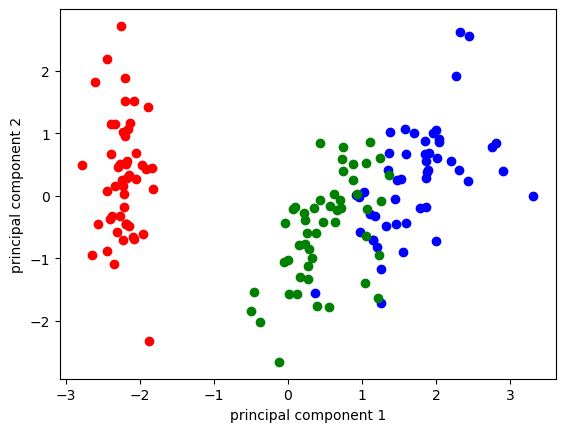

In [7]:
dfsetosa=final_dataframe[df.target=="Iris-setosa"]
dfvirginica=final_dataframe[df.target=="Iris-virginica"]
dfversicolor=final_dataframe[df.target=="Iris-versicolor"]
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

plt.scatter(dfsetosa["PC1"],dfsetosa["PC2"],color="red")
plt.scatter(dfvirginica["PC1"],dfvirginica["PC2"],color="blue")
plt.scatter(dfversicolor["PC1"],dfversicolor["PC2"],color="green")


In [10]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [11]:
pca.explained_variance_ratio_.sum()

0.95800975361482

veri setinin % 96 sı korunmuş